In [3]:
%pylab inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

%matplotlib inline

pd.set_option('display.max_columns', None)

Populating the interactive namespace from numpy and matplotlib


In [4]:
df = pd.read_pickle('DO_NOT_OVERWRITE.pkl')

In [1]:
df.head(15)

NameError: name 'df' is not defined

In [181]:
df.loc[(df['total_dvoa'] > 30)].sort_values(by='total_dvoa')

,year,team,wins,pts/g,tot_pts_allowed,net_pts,total_dvoa,def_dvoa,off_dvoa,st_dvoa,tot_pts,scrm_plays,yds/g,yds/p,1st/g,3rd_made,3rd_att,3rd_pct,4th_made,4th_att,4th_pct,pen_off,pen_yards_off,top/g,off_fum,off_fum_lost,to_diff,rush_att,rush_att/g,rush_yds,rush_avg,rush_yds/g,rush_td,rush_20+,rush_40+,tackles,sacks,int,def_force_fum,def_fum_rec
33,2003,Chiefs,13,30.2,332,152,30.3,9.4,33.4,6.3,484,1003,369.4,5.9,21.8,84,201,42,6,10,60,79,698,29.35,13,6,19,446,27.9,"1,929",4.3,120.6,32,11,0,898,36.0,25,21,12
100,2005,Broncos,13,24.7,258,137,30.4,-7.0,26.9,-3.6,395,1030,360.4,5.6,20.6,76,210,36,14,19,74,97,756,32.40,19,9,20,542,33.9,"2,539",4.7,158.7,25,17,5,753,28.0,20,29,16
481,2017,Saints,11,28.0,326,122,30.7,-7.9,21.6,1.2,448,1000,391.2,6.3,20.8,73,194,38,12,15,80,105,962,31.09,19,10,7,444,27.8,"2,070",4.7,129.4,23,17,5,706,42.0,20,17,5
88,2004,Bills,9,24.7,284,111,31.3,-28.5,-5.9,8.7,395,982,293.2,4.8,16.9,77,215,36,10,21,48,121,1047,30.21,26,12,10,483,30.2,"1,874",3.9,117.1,15,16,2,776,45.0,24,31,15
23,2002,Buccaneers,12,21.6,196,150,31.6,-31.8,-3.8,3.6,346,1022,312.6,4.9,17.9,79,222,36,6,9,67,103,789,32.07,24,11,17,414,25.9,"1,557",3.8,97.3,6,9,1,788,43.0,31,21,7
200,2008,Eagles,9,26.0,289,127,31.8,-23.6,6.5,1.7,416,1056,350.5,5.3,19.9,93,225,41,4,9,44,74,635,31.24,16,10,3,427,26.7,"1,697",4.0,106.1,15,11,0,812,48.0,15,21,14
392,2014,Seahawks,12,24.6,254,140,31.9,-16.8,16.8,-1.7,394,1021,375.8,5.9,20.5,90,212,42,3,11,27,130,1009,32.22,23,7,10,525,32.8,"2,762",5.3,172.6,20,17,6,669,37.0,13,18,10
98,2005,Colts,14,27.4,247,192,32.1,-10.2,24.5,-2.6,439,1000,362.4,5.8,22.7,91,187,49,8,13,62,94,690,30.22,14,8,12,465,29.1,"1,703",3.7,106.4,18,6,0,867,46.0,18,32,13
352,2013,Broncos,13,37.9,399,207,32.7,-0.2,33.5,-1.0,606,1156,457.3,6.3,27.2,95,205,46,8,9,89,117,1000,30.31,27,16,0,461,28.8,"1,873",4.1,117.1,16,9,1,768,41.0,17,16,9
512,2018,Chiefs,12,35.3,421,144,32.9,6.9,34.2,5.6,565,996,425.6,6.8,24.0,83,176,47,12,15,80,137,1152,29.11,18,6,9,387,24.2,"1,855",4.8,115.9,16,19,1,777,52.0,15,23,12


In [7]:
df.describe()

,year,wins,pts/g,tot_pts_allowed,net_pts,total_dvoa,def_dvoa,off_dvoa,st_dvoa,tot_pts,scrm_plays,yds/g,yds/p,1st/g,3rd_made,3rd_att,3rd_pct,4th_made,4th_att,4th_pct,pen_off,pen_yards_off,top/g,off_fum,off_fum_lost,to_diff,rush_att,rush_att/g,rush_avg,rush_yds/g,rush_td,rush_20+,rush_40+,tackles,sacks,int,def_force_fum,def_fum_rec,1st_x_3rd_pct,1_3_4,1st_total,1st/scrm,sack/tack,pts/top/g,long_rush_td
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.00000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,2009.985267,7.988950,22.015838,352.130755,0.130755,-0.093923,-0.133333,-0.293923,0.062615,352.261510,1012.720074,336.268508,5.304972,19.226519,82.248619,212.882136,38.662983,7.440147,15.139963,49.220994,102.629834,855.953959,30.024438,22.464088,10.523020,0.022099,436.176796,27.261694,4.164825,113.987109,13.00000,10.639042,2.079190,806.167587,36.436464,15.222836,17.453039,10.460405,752.414180,37606.266851,307.624309,0.303214,0.045641,0.732011,26.790055
std,4.895943,3.071694,4.444380,57.328659,100.255188,18.493807,9.948575,14.571389,3.892976,71.111171,46.731735,39.125046,0.511088,2.337303,11.636201,13.411075,5.121283,3.150530,4.977692,14.643203,16.554205,148.118706,1.549398,6.014903,3.691384,9.661784,51.306744,3.207695,0.434742,20.710369,5.05979,4.639644,1.675521,63.752719,7.850959,4.889939,6.586433,3.546970,177.743478,16224.493385,37.396849,0.029059,0.011133,0.138172,31.684680
min,2002.000000,0.000000,10.500000,196.000000,-261.000000,-55.500000,-31.800000,-43.300000,-12.000000,168.000000,865.000000,223.200000,3.800000,11.900000,49.000000,164.000000,24.000000,0.000000,4.000000,0.000000,55.000000,415.000000,26.020000,6.000000,2.000000,-28.000000,304.000000,19.000000,3.100000,70.600000,2.00000,0.000000,0.000000,637.000000,10.000000,2.000000,4.000000,2.000000,285.600000,0.000000,190.400000,0.219641,0.011001,0.373267,0.000000
25%,2006.000000,6.000000,18.800000,313.000000,-74.500000,-13.050000,-6.650000,-10.100000,-2.600000,300.500000,983.000000,310.950000,5.000000,17.600000,75.000000,204.000000,35.000000,5.000000,11.500000,40.000000,92.000000,766.500000,29.065000,18.000000,8.000000,-7.000000,400.500000,25.050000,3.900000,99.650000,9.00000,7.000000,1.000000,756.000000,31.000000,12.000000,13.000000,8.000000,630.000000,25614.000000,281.600000,0.283544,0.038089,0.636774,7.000000
50%,2010.000000,8.000000,22.100000,348.000000,3.000000,0.000000,0.500000,-0.300000,0.000000,354.000000,1013.000000,336.700000,5.300000,19.200000,82.000000,213.000000,39.000000,7.000000,15.000000,50.000000,103.000000,859.000000,30.190000,22.000000,10.000000,0.000000,430.000000,26.900000,4.100000,112.000000,13.00000,10.000000,2.000000,809.000000,36.000000,15.000000,16.000000,10.000000,736.300000,35685.000000,307.200000,0.302312,0.045455,0.726062,16.000000
75%,2014.000000,10.000000,24.900000,390.000000,73.500000,13.500000,6.900000,9.800000,2.700000,398.000000,1042.000000,362.850000,5.600000,20.800000,91.000000,222.000000,42.000000,9.000000,18.000000,59.000000,113.000000,949.500000,31.200000,26.000000,13.000000,7.000000,470.000000,29.400000,4.500000,126.150000,16.00000,13.000000,3.000000,855.000000,41.000000,18.000000,22.000000,13.000000,865.200000,47127.250000,332.800000,0.323122,0.053109,0.818001,36.000000
max,2018.000000,16.000000,37.900000,517.000000,315.000000,52.900000,26.100000,43.500000,12.200000,606.000000,1191.000000,467.100000,6.800000,27.800000,127.000000,253.000000,57.000000,19.000000,33.000000,89.000000,163.000000,1358.000000,34.040000,42.000000,26.000000,28.000000,618.000000,38.600000,5.500000,183.700000,32.00000,33.000000,9.000000,989.000000,61.000000,31.0000

In [23]:
net_team

,wins
team,
49ers,117
Bears,131
Bengals,133
Bills,116
Broncos,156
Browns,83
Buccaneers,112
Cardinals,122
Chargers,151


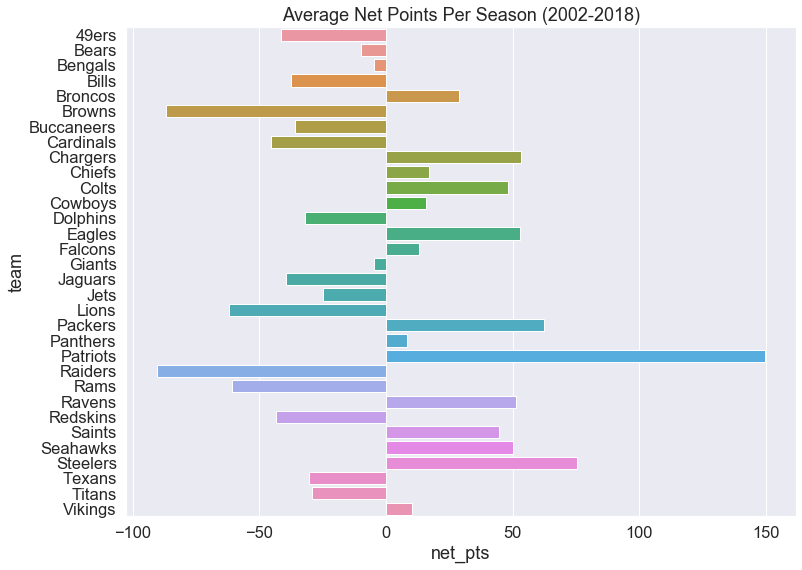

In [39]:
net_team = pd.DataFrame(df.groupby('team').net_pts.mean())
sns.set(font_scale=1.5)
plt.figure(figsize=(12,9))
plt.title('Average Net Points Per Season (2002-2018)')
plt.xlabel('Wins')
plt.ylabel('Team')

sns.barplot(net_team.net_pts, net_team.index)

In [31]:
df[['team','year','net_pts']]

,team,year,net_pts
0,49ers,2002,16
1,49ers,2003,47
2,49ers,2004,-193
3,49ers,2005,-189
4,49ers,2006,-114
...,...,...,...
538,Vikings,2014,-18
539,Vikings,2015,63
540,Vikings,2016,20
541,Vikings,2017,130


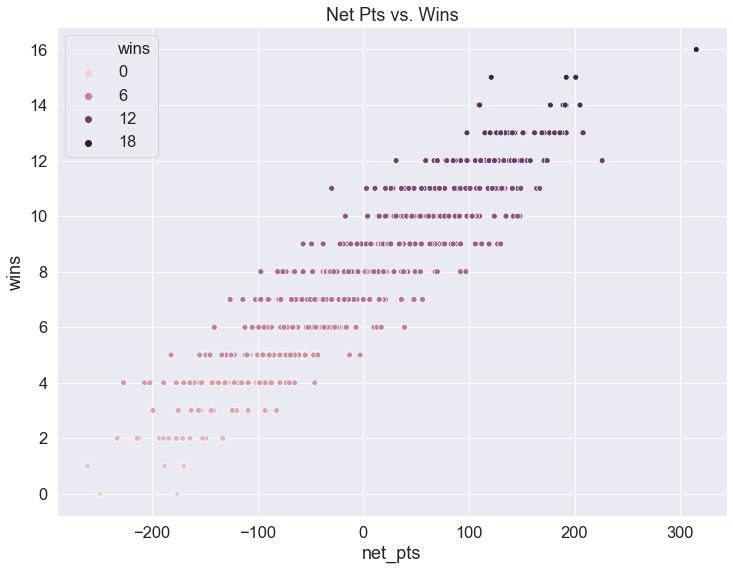

In [32]:
plt.figure(figsize=(12,9))
plt.title('Net Pts vs. Wins')
sns.scatterplot(df.net_pts, df.wins, hue=df.wins);

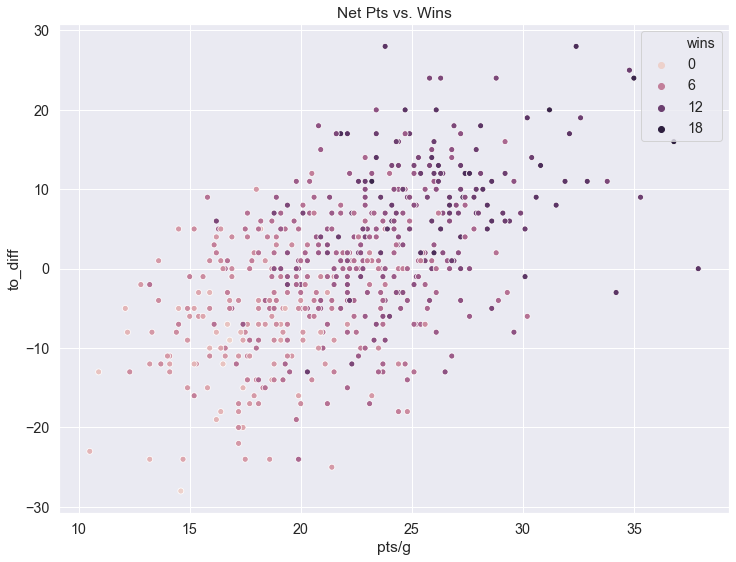

In [228]:
plt.figure(figsize=(12,9))
plt.title('Net Pts vs. Wins')
sns.scatterplot(df['pts/g'], df.to_diff, hue=df.wins);

In [231]:
smaller_df = df[['wins','pts/g', 'tot_pts_allowed', 'net_pts',
       'total_dvoa', 'def_dvoa', 'off_dvoa', 'st_dvoa', 'tot_pts',
       'scrm_plays', 'yds/g', 'yds/p']]

smaller_df.head()

,wins,pts/g,tot_pts_allowed,net_pts,total_dvoa,def_dvoa,off_dvoa,st_dvoa,tot_pts,scrm_plays,yds/g,yds/p
0,11,28.1,304,146,28.5,-6.2,22.0,0.3,450,1069,389.8,5.8
1,6,24.4,442,-52,-19.6,14.5,1.1,-6.2,390,1080,387.0,5.7
2,9,24.5,344,48,15.2,-0.4,16.6,-1.8,392,1057,380.6,5.8
3,8,29.2,399,68,24.4,14.0,35.4,3.1,467,965,375.0,6.2
4,10,24.4,345,45,6.8,-5.3,6.6,-5.1,390,1097,372.0,5.4


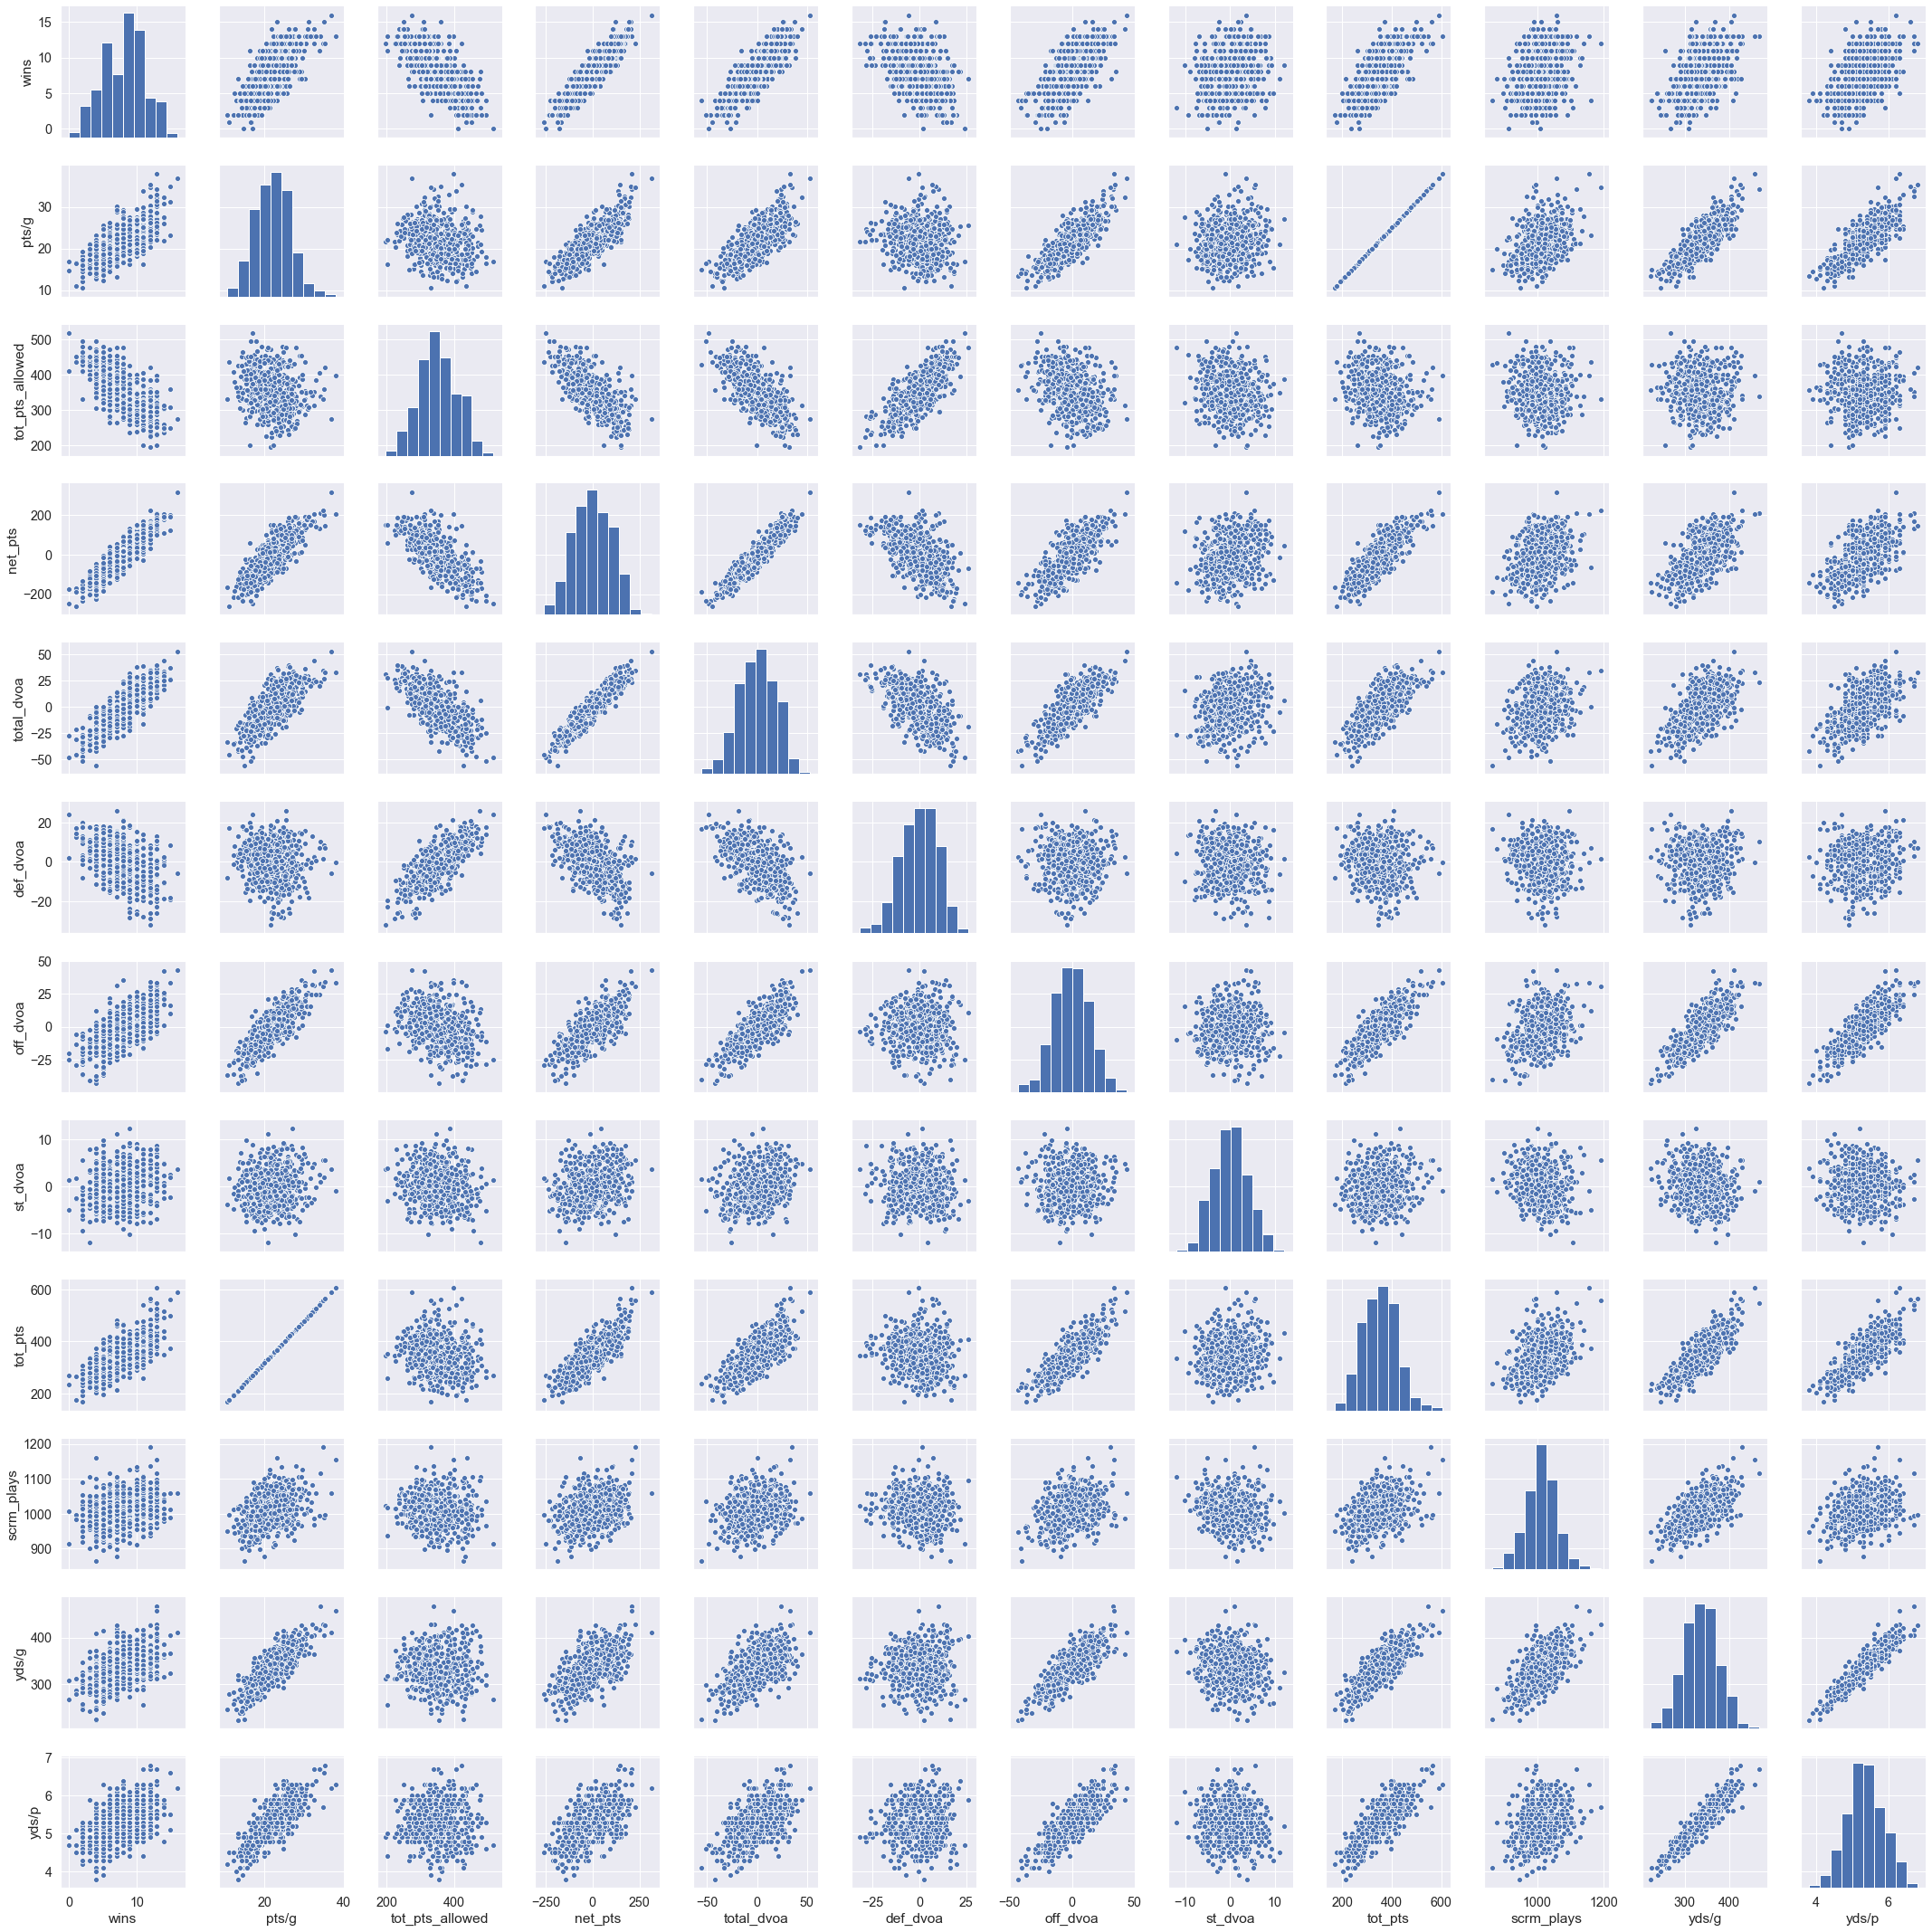

In [232]:
sns.pairplot(smaller_df)

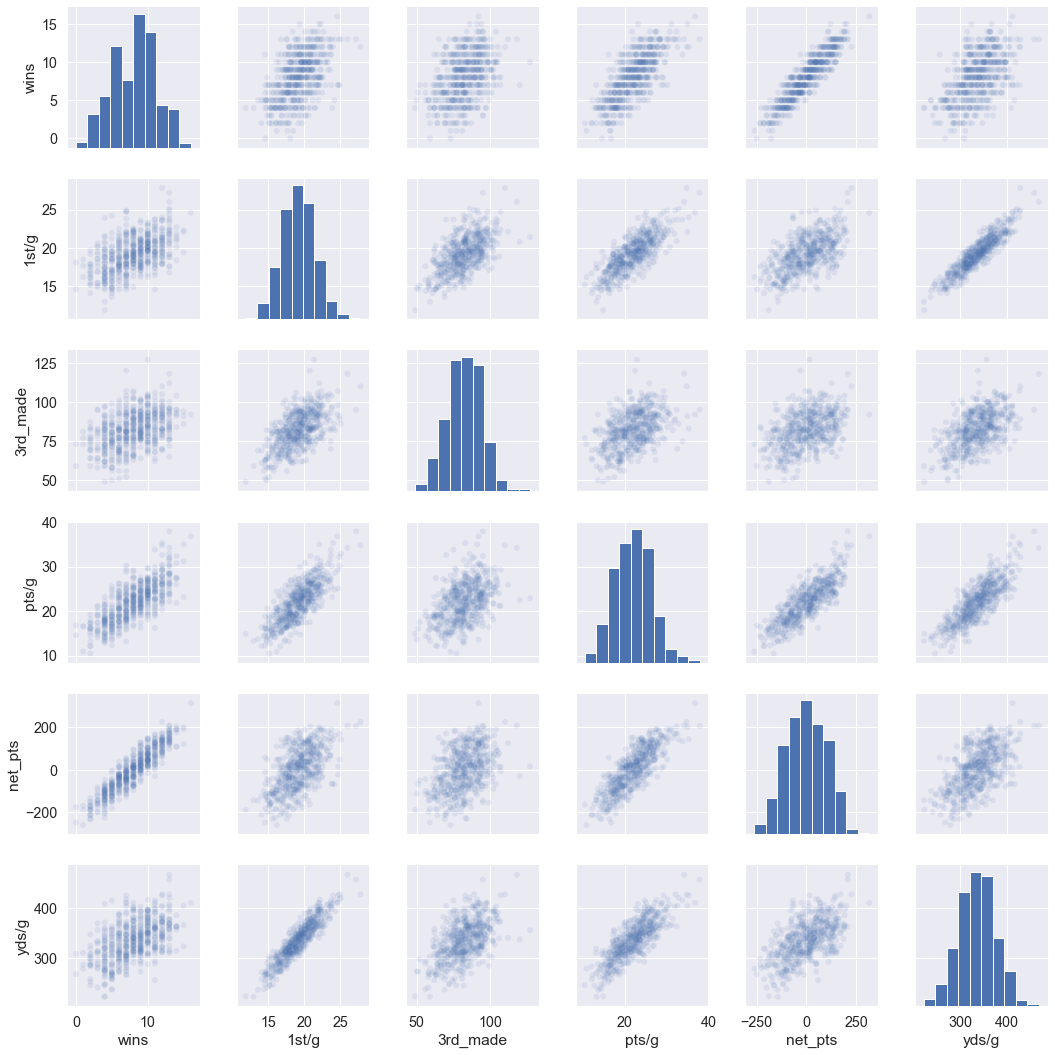

In [243]:
next_chunk = df[['wins', '1st/g', '3rd_made', 'pts/g', 'net_pts', 'yds/g']]

sns.pairplot(next_chunk, plot_kws=dict(alpha=.1, edgecolor='none'));

In [6]:
df.columns

Index(['year', 'team', 'wins', 'pts/g', 'tot_pts_allowed', 'net_pts',
       'total_dvoa', 'def_dvoa', 'off_dvoa', 'st_dvoa', 'tot_pts',
       'scrm_plays', 'yds/g', 'yds/p', '1st/g', '3rd_made', '3rd_att',
       '3rd_pct', '4th_made', '4th_att', '4th_pct', 'pen_off', 'pen_yards_off',
       'top/g', 'off_fum', 'off_fum_lost', 'to_diff', 'rush_att', 'rush_att/g',
       'rush_yds', 'rush_avg', 'rush_yds/g', 'rush_td', 'rush_20+', 'rush_40+',
       'tackles', 'sacks', 'int', 'def_force_fum', 'def_fum_rec'],
      dtype='object')

In [29]:
base_df = df[['wins', 'net_pts','total_dvoa', 'pts/g','yds/g','sacks']]

In [30]:
base_df.head()

,wins,net_pts,total_dvoa,pts/g,yds/g,sacks
0,11,146,28.5,28.1,389.8,43.0
1,6,-52,-19.6,24.4,387.0,27.0
2,9,48,15.2,24.5,380.6,40.0
3,8,68,24.4,29.2,375.0,34.0
4,10,45,6.8,24.4,372.0,50.0


In [34]:
base_df.corr()

,wins,net_pts,total_dvoa,pts/g,yds/g,sacks
wins,1.000000,0.917130,0.855375,0.744749,0.526069,0.407293
net_pts,0.917130,1.000000,0.937503,0.829286,0.598064,0.458677
total_dvoa,0.855375,0.937503,1.000000,0.768127,0.579679,0.433693
pts/g,0.744749,0.829286,0.768127,1.000000,0.820892,0.330896
yds/g,0.526069,0.598064,0.579679,0.820892,1.000000,0.196840
sacks,0.407293,0.458677,0.433693,0.330896,0.196840,1.000000


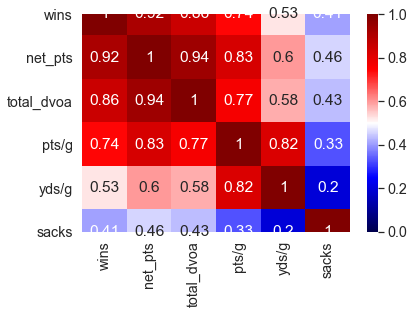

In [44]:
sns.heatmap(base_df.corr(), cmap="seismic", annot=True, vmin=0, vmax=1)

#plt.gca().set_ylim(len(df.corr())+0.5, -0.5);  # quick fix to make sure viz isn't cut off

  # quick fix to make sure viz isn't cut off


In [2]:
df_next = pd.read_pickle('NEW_MASTER_WINS.pkl')

In [17]:
lr1 = LinearRegression()

#X = df['total_dvoa'].values.reshape(-1,1)
#y = base_df['wins']

#lr.fit(X,y)

In [48]:
lr.score(X,y)

0.731667202001687

In [14]:
df_n1 = df_next[['wins', 'pts/g','tot_pts_allowed', 'net_pts', 'total_dvoa', 'def_dvoa', 'off_dvoa','st_dvoa', 'tot_pts', 'scrm_plays', 'yds/g', 'yds/p', '1st/g','3rd_made', '3rd_att', '3rd_pct', '4th_made', '4th_att', '4th_pct','pen_off', 'pen_yards_off', 'top/g', 'off_fum', 'off_fum_lost','to_diff', 'rush_att', 'rush_att/g', 'rush_avg','rush_yds/g', 'rush_td', 'rush_20+', 'rush_40+', 'tackles', 'sacks','int', 'def_force_fum', 'def_fum_rec']]
df_y = df_next['next_year']

In [18]:
lr1.fit(df_n1, df_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
lr1.score(df_n1, df_y)

0.2053697830021194

In [20]:
df_next.columns

Index(['team', 'year', 'prev_year', 'next_year', 'wins', 'pts/g',
       'tot_pts_allowed', 'net_pts', 'total_dvoa', 'def_dvoa', 'off_dvoa',
       'st_dvoa', 'tot_pts', 'scrm_plays', 'yds/g', 'yds/p', '1st/g',
       '3rd_made', '3rd_att', '3rd_pct', '4th_made', '4th_att', '4th_pct',
       'pen_off', 'pen_yards_off', 'top/g', 'off_fum', 'off_fum_lost',
       'to_diff', 'rush_att', 'rush_att/g', 'rush_yds', 'rush_avg',
       'rush_yds/g', 'rush_td', 'rush_20+', 'rush_40+', 'tackles', 'sacks',
       'int', 'def_force_fum', 'def_fum_rec'],
      dtype='object')

In [21]:
smaller_df = df_next[['prev_year', 'next_year', 'wins', 'pts/g','total_dvoa','to_diff','net_pts', 'tot_pts', 'yds/g']]

In [42]:
small2 = df_next[['wins','next_year','1st/g', 'pts/g',
       'tot_pts_allowed', 'net_pts', 'total_dvoa', 'rush_td', 'off_dvoa',
       '3rd_pct', '4th_pct','rush_yds/g','tot_pts', 'yds/g', 'yds/p','top/g', 'to_diff', 'rush_avg',
       'pen_off']]

In [75]:
#adding pythag wins
small2['pythag'] = (small2['tot_pts']**1.83)/((small2['tot_pts']**1.83)+(small2['tot_pts_allowed']**1.83))
#small2['pts_time'] = small2['top/g']*small2['pts/g']
small2['pts_time'] = small2['pts/g']/small2['top/g']
small2['rush_success'] = ((small2['rush_td']*6)/df_next['tot_pts'])

In [47]:
small2

,wins,next_year,1st/g,pts/g,tot_pts_allowed,net_pts,total_dvoa,rush_td,off_dvoa,3rd_pct,4th_pct,rush_yds/g,tot_pts,yds/g,yds/p,top/g,to_diff,rush_avg,pen_off,pythag
0,10,7,21.4,22.9,351,16,13.0,16,19.2,52,62,140.2,367,356.3,5.3,32.39,10,4.6,87,0.522273
1,7,2,19.6,24.0,337,47,-0.9,16,7.8,40,26,142.4,384,355.4,5.5,31.09,12,4.6,104,0.564911
2,2,4,17.5,16.2,452,-193,-41.8,10,-21.2,32,74,90.6,259,286.6,4.5,29.18,-19,3.5,103,0.247180
3,4,7,11.9,14.9,428,-189,-55.5,9,-40.4,24,62,105.6,239,224.2,4.1,27.37,-9,3.9,106,0.237702
4,7,5,15.2,18.6,412,-114,-19.4,12,-8.2,34,54,135.8,298,303.8,5.3,29.00,-5,4.9,93,0.343472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,5,7,19.3,24.4,480,-89,-11.4,23,-4.7,36,53,130.1,391,344.2,5.4,28.28,-12,4.9,70,0.398874
522,7,11,18.0,20.3,343,-18,-8.7,12,-7.4,39,50,112.8,325,315.5,5.1,28.52,-1,4.4,100,0.473073
523,11,8,18.6,22.8,302,63,5.7,18,0.0,38,46,138.2,365,321.2,5.3,30.34,5,4.7,88,0.593618
524,8,13,18.9,20.4,307,20,-1.7,9,-9.8,38,44,75.3,327,315.1,5.0,30.36,11,3.2,103,0.531514


In [76]:
small2 = small2[['wins','next_year','pythag','rush_success','pts_time','1st/g', 'pts/g',
       'tot_pts_allowed', 'net_pts', 'total_dvoa', 'rush_td', 'off_dvoa',
       '3rd_pct', '4th_pct','rush_yds/g','tot_pts', 'yds/g', 'yds/p','top/g', 'to_diff', 'rush_avg',
       'pen_off']]

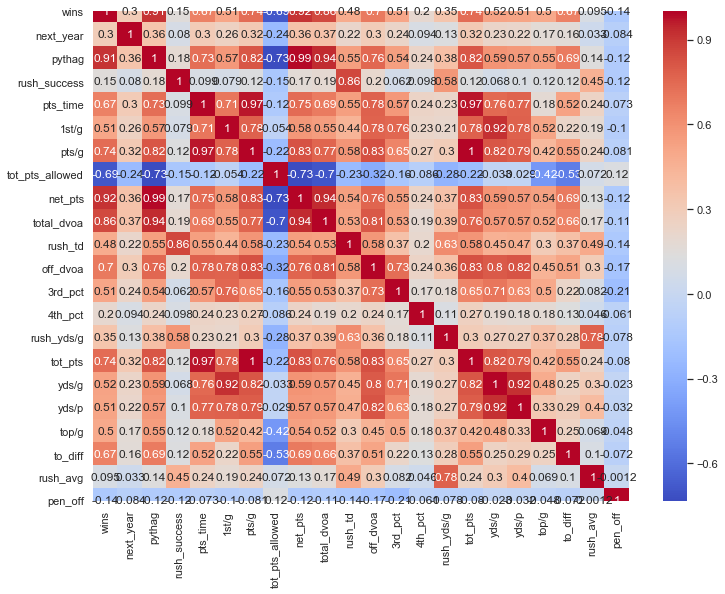

In [77]:
plt.figure(figsize=(12,9))
sns.heatmap(small2.corr(), annot=True, cmap='coolwarm')

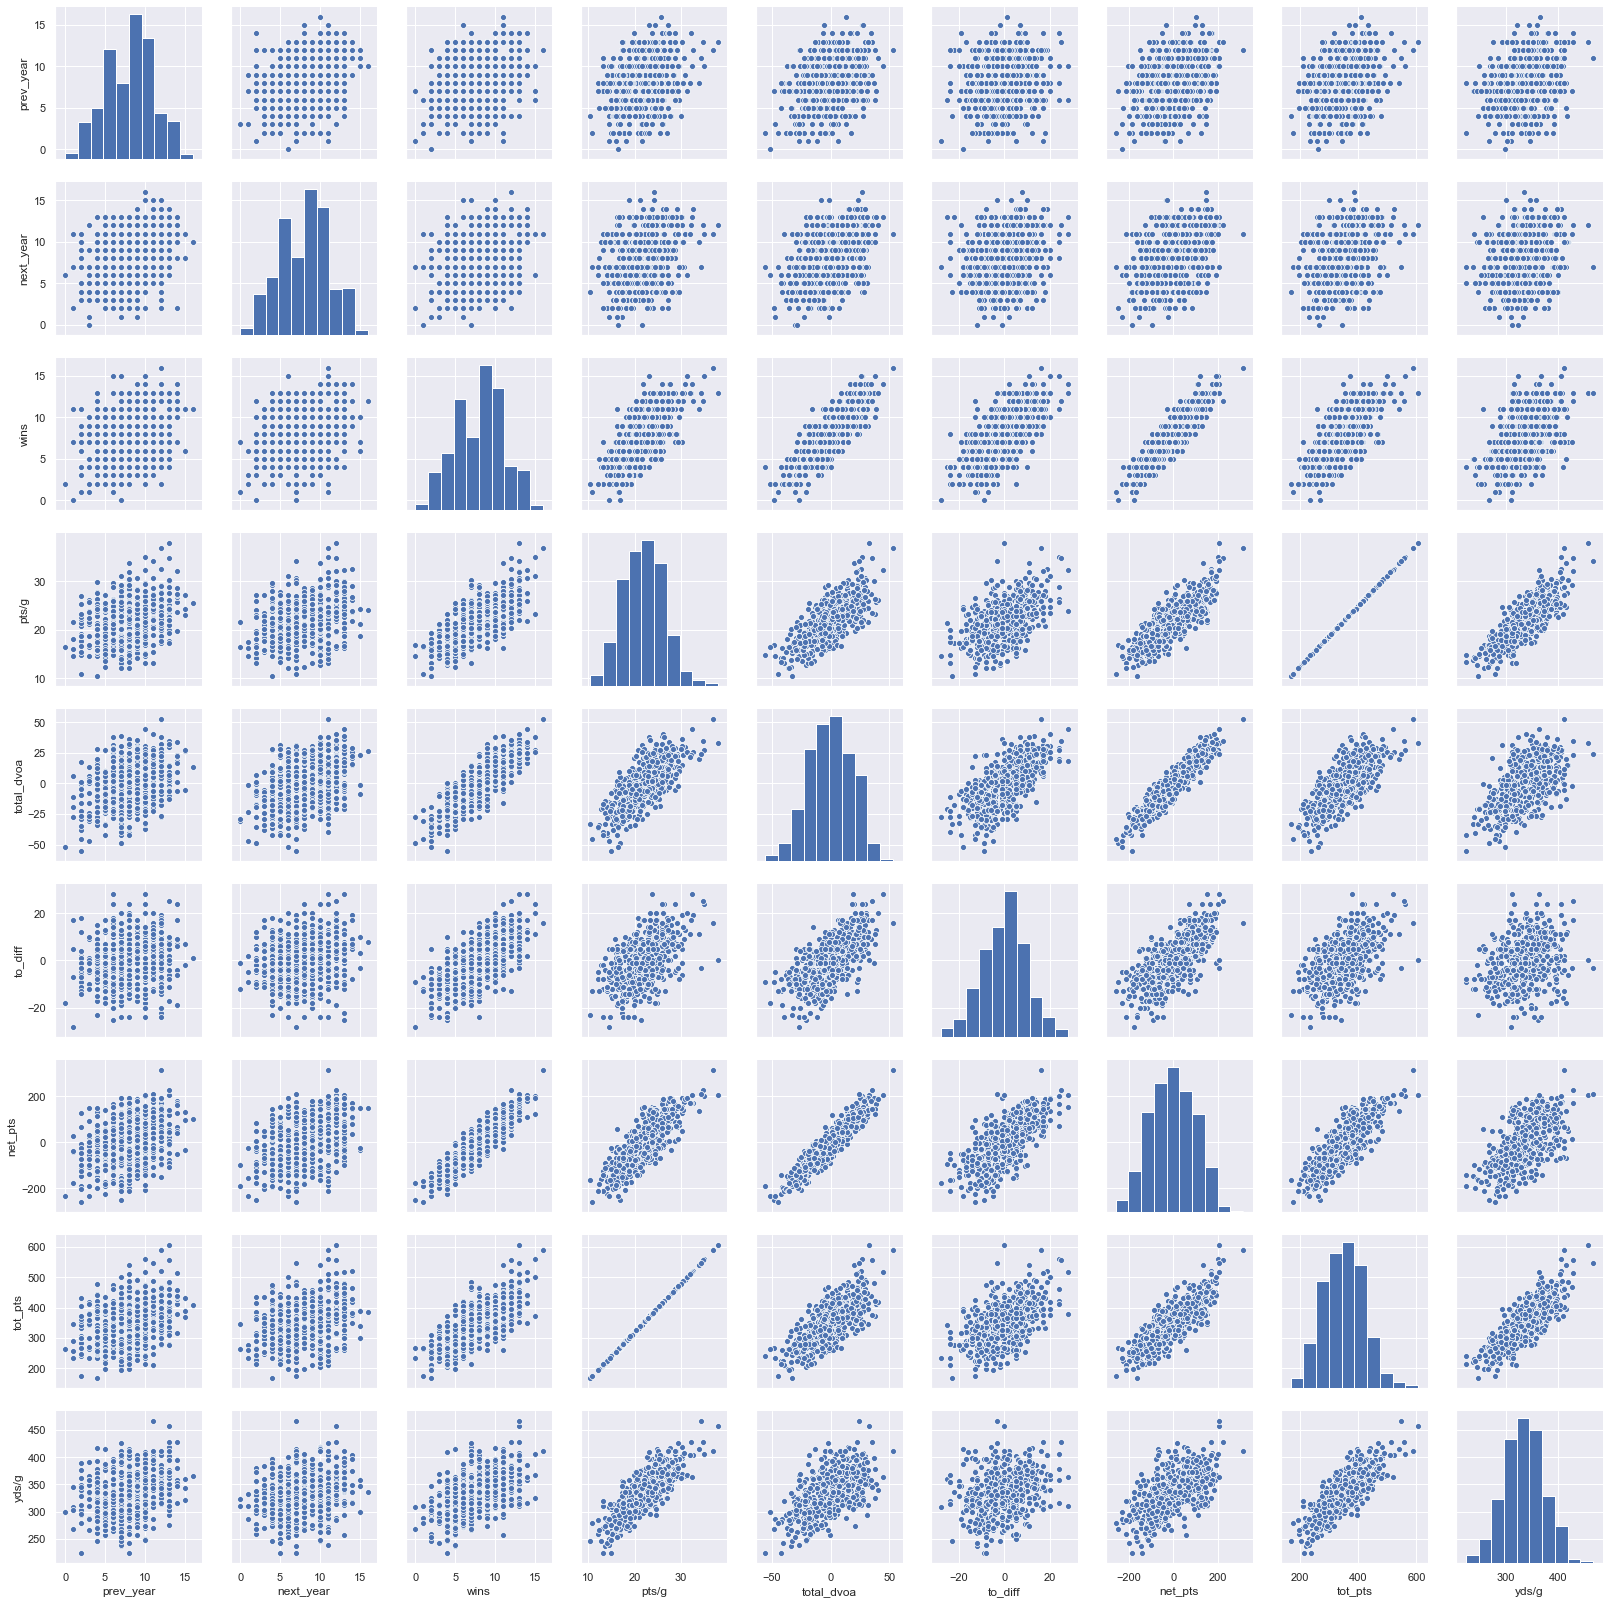

In [22]:
sns.set()
sns.pairplot(smaller_df)

In [51]:
X_all = base_df.iloc[:,1:]

lr.fit(X_all, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
lr.score(X_all, y)

0.8425433210802777

In [53]:
lr.intercept_

9.308710000738218

In [57]:
# using stats model
model = sm.OLS(y, sm.add_constant(X_all))
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wins   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     574.7
Date:                Sun, 19 Jan 2020   Prob (F-statistic):          7.07e-213
Time:                        20:18:39   Log-Likelihood:                -877.46
No. Observations:                 543   AIC:                             1767.
Df Residuals:                     537   BIC:                             1793.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3087      0.667     13.956      0.000       7.998      10.619
net_pts        0.0307      0.002     16.848      0.000       0.027       0.034
total_dvoa    -0.0060      0.008     -0.722      0.471      -0.022       0.010
pts/g         -0.0250      0.031     -0.805      0.421      -0.086       0.036
yds/g         -0.0014      0.002     -0.574      0.566      -0.006       0.003
sacks         -0.0081      0.008     -1.073      0.284      -0.023       0.007
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                1.181
Skew:                           0.077   Prob(JB):                        0.554
Kurtosis:                       2.831   Cond. No.                     4.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

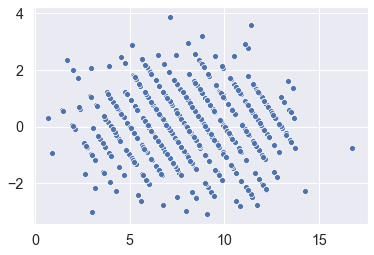

In [58]:
#Viewing residuals
sns.scatterplot(fit.predict(), fit.resid)

In [92]:
lr.predict([[-130,-29.2,18.4,303.2,22.0]])

array([4.42579079])

In [59]:
base_df_2 = df[['team','year','wins', 'net_pts','total_dvoa', 'pts/g','yds/g','sacks']]

In [89]:
base_df_2.loc[base_df_2['team']== 'Chiefs']

,team,year,wins,net_pts,total_dvoa,pts/g,yds/g,sacks
3,Chiefs,2002,8,68,24.4,29.2,375.0,34.0
33,Chiefs,2003,13,152,30.3,30.2,369.4,36.0
64,Chiefs,2004,7,48,15.1,30.2,418.4,41.0
96,Chiefs,2005,10,78,24.4,25.2,387.0,29.0
143,Chiefs,2006,9,16,5.3,20.7,321.4,32.0
190,Chiefs,2007,4,-109,-19.5,14.1,276.8,37.0
215,Chiefs,2008,2,-149,-29.4,18.2,308.7,10.0
248,Chiefs,2009,4,-130,-29.2,18.4,303.2,22.0
267,Chiefs,2010,10,40,0.3,22.9,349.7,39.0
314,Chiefs,2011,7,-126,-16.9,13.2,310.8,29.0
